In [ ]:
#やること
#DAY1の宿題
  #1. 自分が取り組む通し課題を1つ選択する
    # • Kaggleアカウントを取得し、該当課題のデータをダウンロードする。
#○→「精神病を患う人を予測する」を選択

  #2. 目的変数と説明変数の関係を確認するためのグラフを作成する(ここからはノートブック上の作業です)。
#○→目的変数(treatmentを利用),説明変数（その他のデータ）

  #3. 目的変数を説明するのに有効そうな説明変数を見つける。
#△→それっぽいデータの絞り込み？？
#    →@分析が必要

  #4. 欠測値と異常値を確認し、適切に処理する(前処理で習ったことを利用して)。
#○→
#○• 欠測値の処理、補間 →4項目が欠測(state【州_515】,self_employed【自営業_18】,work_interfere【仕事への影響を感じるか_264】,comments【コメント_1095】)が欠測
#                                      →△state@アメリカ在住以外の人が欠測になっているらしい@no_dataにしました
#                                      →△self_employed@??@no_dataにしました
#                                      →△work_interfere@??@no_dataにしました
#                                      →△comments@??未記入のため" "(空白)にしました。
#○• 外れ値 → 年齢の異常値排除（-1726,, 329, -29, -1, 99999999999）とか
#                  →0歳〜100歳　@5,8,11歳も異常値でもいい気がする。@30歳前後の回答が多い
#○• 名寄せ → 性別の名寄せ
#○• 正規化、標準化 → 標準化
#○• 時系列データの場合 → ×
#○• 時間粒度の変更(例、10分間隔を1時間間隔に) → ×
#○• 画像データの場合 → ×
#○• サイズ統一化 → ×
#○• RGBのグレースケール化 → ×
#○• テキストデータの場合 • 分かち書き → ×
#○• 不要文字の削除 → ×
#○• 半角全角の統一化 → ×

  #5. DAY1で学んだアルゴリズムを利用する。
    #• 回帰の場合は線形回帰、分類の場合はロジスティック回帰
#○→分類なので、ロジスティック回帰を利用
    #• 質的変数が扱えないアルゴリズムを使う場合は、ダミー変数に置き換える。
#○→

  #6. 予測精度または識別精度は、交差検証によって確認する。
    #• 回帰問題の場合は、MSE、RMSE、MAEを求める。
#○→×
    #• 分類問題の場合は、混同行列を作成し、Accuracy, Recall, Precisionを求める。
#○→混同行列を作成し、Accuracy, Recall, Precisionを求める。

  #7. できたところまでをnotebookでまとめ、KernelsまたはGithubで公開する。 • 公開方法がわからない方は、ipynbファイルを#generalに貼る
#△→公開する。

In [2]:
#やること
#DAY2の宿題
#• DAY2,3で学んだアルゴリズムを利用してモデルをつくり、DAY1宿題提出時の精度を比較する。
  #DAY1_ロジスティック回帰(LogisticRegression)
  # 決定木(DecisionTreeClassifier)
  #ランダムフォレスト(RandomForestClassifier)
  #アダブースト(AdaBoostClassifier)
  #K近傍法（KNeighborsClassifier）
#• クロスバリデーションによるパラメータチューニングを行う
  #
#• CV済のモデルによって、精度および結果の評価を行う
  #
#• その他、精度の向上ができるような処理に取り組み、精度を上げる
  #
#• できたところまでをnotebookでまとめ、宿題として提出する。
  #
#• 前回から取り組んだ内容・工夫、精度がどのように変化したかのコメントのをノートブッ クに含めること
  #

In [3]:
#課題　「精神病を患う人を予測する」(Mental Health in Tech Survey)
#目次
###[データの入手、データの前処理]###
#1.データ確認
#2.欠測値の確認
#3.外れ値、名寄せの対応
#4.目的変数と説明変数の関係
###[手法の選択、ハイパーパラメータの選択、モデルの学習]###
#5.各アルゴリズムの精度検証（CV済みモデルにて）
 #5-1ロジスティック回帰(LogisticRegression)
 #5-2決定木(DecisionTreeClassifier)
 #5-3ランダムフォレスト(RandomForestClassifier)
 #5-4アダブースト(AdaBoostClassifier)
 #5-5K近傍法（KNeighborsClassifier）
###[モデルの評価]###
#6.各モデルの比較
###[精度は十分か]###
#7.精度向上検討
#8.まとめ

In [ ]:
#・説明変数の意味を調べる
#・ノートブックのマークダウン記法を使いこなす
#・相関係数だけで判断しない
#・２変数間だけでなく、３変数間でも評価する
#・各手法

In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#データ読み込み
df_data = pd.read_csv("../Downloads/survey.csv")
print(df_data.columns)
display(df_data.head())
display(df_data.tail())
print(df_data.shape)

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


(1259, 27)


In [5]:
###1.データ確認

In [6]:
#各データの種類
for column in df_data.columns.values:
    if column in ["Timestamp", "comments"]:
        continue
    print(column, ":", len(set(df_data[column])), "件")
    print(set(df_data[column]))
    print()
#Timestampとcommentsも含めるのはどうすれば？？
 #→timestampを使うためには、
 #    例えばdayとかmonthのような要素に変換する必要があり、
 #    commentを使うためには、例えば文字数とかのような処理を実施すると使えるようになると思います。

Age : 53 件
{5, 8, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, -1726, 72, 329, -29, -1, 99999999999}

Gender : 49 件
{'Cis Man', 'non-binary', 'p', 'Male', 'Male (CIS)', 'Malr', 'cis male', 'Mal', 'maile', 'Enby', 'Guy (-ish) ^_^', 'Agender', 'woman', 'm', 'Neuter', 'Female (trans)', 'ostensibly male, unsure what that really means', 'f', 'msle', 'Male-ish', 'Trans woman', 'Female (cis)', 'Woman', 'Cis Male', 'male leaning androgynous', 'Trans-female', 'Female ', 'queer', 'male', 'Nah', 'cis-female/femme', 'A little about you', 'queer/she/they', 'All', 'Mail', 'Cis Female', 'Male ', 'M', 'something kinda male?', 'Androgyne', 'female', 'Femake', 'Genderqueer', 'femail', 'Female', 'Make', 'Man', 'fluid', 'F'}

Country : 48 件
{'Colombia', 'Latvia', 'Denmark', 'New Zealand', 'Croatia', 'Sweden', 'Zimbabwe', 'Italy', 'Israel', 'Hungary', 'Norway', 'China', 'Sl

In [7]:
# 各データの属性の確認
print(df_data.dtypes)

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object


In [8]:
###2.欠測値の確認

In [9]:
# 欠測値の数
pd.DataFrame(df_data.isnull().sum(), columns=["num of missing"])

,num of missing
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [10]:
#欠測値の処理（state）
print("アメリカに住んでいる人のデータ")
display(df_data[["Country", "state"]][df_data["Country"] == "United States"].head())
print("アメリカ以外に住んでいる人のデータ")
display(df_data[["Country", "state"]][df_data["Country"] != "United States"].head())

# アメリカ以外に住んでいる人が欠損値となることがわかったので、"no_data"という文字列で置換
df_data = df_data.fillna({"state":"no_data"})
print("欠損値をno_dataの文字列に置き換え")
df_data[["Country", "state"]].head()

アメリカに住んでいる人のデータ


,Country,state
0,United States,IL
1,United States,IN
4,United States,TX
5,United States,TN
6,United States,MI


アメリカ以外に住んでいる人のデータ


,Country,state
2,Canada,NaN
3,United Kingdom,NaN
7,Canada,NaN
9,Canada,NaN
11,Bulgaria,NaN


欠損値をno_dataの文字列に置き換え


,Country,state
0,United States,IL
1,United States,IN
2,Canada,no_data
3,United Kingdom,no_data
4,United States,TX


In [11]:
#欠測値の処理（sself_employed）
df_data = df_data.fillna({"self_employed":"no_data"})

In [12]:
#欠測値の処理（work_interfere）
df_data = df_data.fillna({"work_interfere":"no_data"})

In [13]:
#欠測値の処理（comments）
df_data = df_data.fillna({"comments":""})

In [14]:
# 欠測値の数（再確認）
pd.DataFrame(df_data.isnull().sum(), columns=["num of missing"])

,num of missing
Timestamp,0
Age,0
Gender,0
Country,0
state,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0


In [15]:
###3.外れ値、名寄せの対応

Age,-1726,-29,-1,5,8,11,18,19,20,21,...,57,58,60,61,62,65,72,329,99999999999,All
treatment,,,,,,,,,,,,,,,,,,,,,
No,0,1,0,1,0,1,4,5,4,8,...,1,0,1,0,1,1,0,0,0,622
Yes,1,0,1,0,1,0,3,4,2,8,...,2,1,1,1,0,0,1,1,1,637
All,1,1,1,1,1,1,7,9,6,16,...,3,1,2,1,1,1,1,1,1,1259


外れ値削除後の年齢データの分布の確認


/Users/ri003067/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


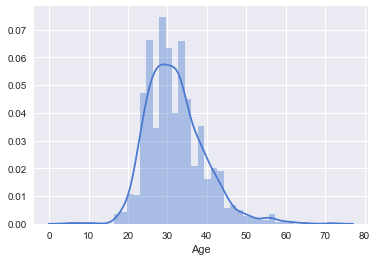

In [16]:
#"Age"の外れ値の対応

#現状確認
df_c = pd.crosstab(index=df_data["treatment"], columns=df_data["Age"], margins=True)
display(df_c) 

# 外れ値を削除
df_data = df_data[(0<df_data["Age"])&(df_data["Age"]<100)]

import seaborn as sns
# 外れ値を削除後のデータの確認
print("外れ値削除後の年齢データの分布の確認")
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))
sns.distplot(df_data["Age"]);

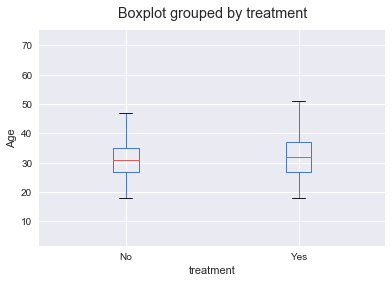

In [17]:
#箱ひげ図の見方
#区間D：ひげの上端（最大値）から箱の上端（第三四分位）まで
#区間C：箱の上端（第三四分位）から箱の中央の線（中央値）まで
#区間B：箱の中央の線（中央値）から箱の下端（第一四分位）まで
#区間A：箱の下端（第一四分位）からひげの下端（最小値）まで
#A、B、C、Dの4区間のなかに、それぞれ同じ個数だけデータが入っています。
#しかし、同じ個数でもその区間の長さが異なることから、データのばらつき具合を知ることができます。
#例えば、区間Bと区間Dでは、区間Bの方が区間が短いことからよりデータが集中していることが分かります。
#また、箱の高さ（区間Bと区間Cを合わせたもの）は全データの半分のデータを表すことから、
#およそ「２7」から「３７」の範囲に全体の半分のデータが存在することが読み取れます。

df_data.boxplot(column="Age",by="treatment")
plt.title("") #意外と必要
plt.ylabel("Age")
plt.show()

In [18]:
#性別の名寄せ（項目確認）
col = "Gender"
df_data[col].replace("All","all", inplace=True)
df_gender = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True)
display(df_gender.T.sort_values("All",ascending=False))

treatment,No,Yes,All
Gender,,,
All,621,633,1254
Male,329,284,613
male,112,93,205
Female,37,84,121
M,69,47,116
female,16,46,62
F,12,26,38
m,20,14,34
f,6,9,15


In [19]:
#性別の名寄せ(作業)
df_data["Gender2"] = df_data["Gender"].map({"Male":"Male","Female":"Female","male":"Male","female":"Female","M":"Male","F":"Female"})
col = "Gender2" #ざっくり仕分け
df_gender = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True)
display(df_gender)


df_data["Gender3"] = df_data["Gender"].map({"Male":"Male","male":"Male","Female":"Female","M":"Male","female":"Female",
                                            "F":"Female","m":"Male","f":"Female","Make":"Male","Male":"Male","Woman":"Female",
                                            "Female (trans)":"Female","Cis Male":"Male","Man":"Male","Female":"Female","non-binary":"?",
                                            "cis-female/femme":"Female","p":"?","femail":"Female","fluid":"?","maile":"Male",
                                            "ostensibly male, unsure what that really means":"?","woman":"Female","something kinda male?":"?",
                                            "queer":"?","male leaning androgynous":"?","cis male":"Male","msle":"Male",
                                            "queer/she/they":"?","A little about you":"?","all":"?","Guy (-ish) ^_^":"?",
                                            "Androgyne":"?","Cis Female":"Female","Cis Man":"Male","Enby":"?","Femake":"Female",
                                            "Female (cis)":"Female","Genderqueer":"?","Mail":"Male","Trans-female":"Female",
                                            "Mal":"Male","Male (CIS)":"Male","Male-ish":"Male","Malr":"Male","Agender":"?","Neuter":"?",
                                            "Trans woman":"Female","Nah":"?"})
col = "Gender3" #しっかり仕分け@一概にきちんと仕分ければ良いわけではない？
df_gender = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True)
display(df_gender)

#元データの個数　No621,Yes633,All1254
#MaleとFemaleが２つある？？
#たぶん各々２つ目は反映されてない
#２つ目のMale　Noが1個 Yesが2個
#２つ目のFemale　Noが1個 Yesが1個

Gender2,Female,Male,All
treatment,,,
No,65,510,575
Yes,156,424,580
All,221,934,1155


Gender3,?,Female,Male,All
treatment,,,,
No,3,77,539,619
Yes,12,172,446,630
All,15,249,985,1249


In [20]:
###4.目的変数と説明変数の関係

精神と年齢の関係性


Age,5,8,11,18,19,20,21,22,23,24,...,55,56,57,58,60,61,62,65,72,All
treatment,,,,,,,,,,,,,,,,,,,,,
No,1,0,1,4,5,4,8,10,27,28,...,0,1,1,0,1,0,1,1,0,621
Yes,0,1,0,3,4,2,8,11,24,18,...,3,3,2,1,1,1,0,0,1,633
All,1,1,1,7,9,6,16,21,51,46,...,3,4,3,1,2,1,1,1,1,1254


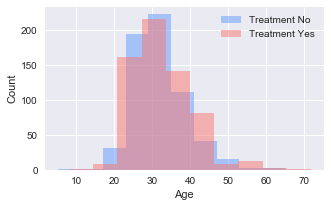

In [21]:
#目的変数@treatment
#説明変数@treatment以外

#精神(treatment)と年齢(Age)の関係性
print("精神と年齢の関係性")
df_data_c = pd.crosstab(index=df_data["treatment"], columns=df_data["Age"], margins=True)
display(df_data_c) 

# ヒストグラムで年代別の傾向を見てみる
plt.figure(figsize=(5,3))
df_data["Age"][df_data["treatment"] == "No"].hist(color="#5F9BFF", alpha=.5, label=["Treatment No"]) # 薄い青色
df_data["Age"][df_data["treatment"] == "Yes"].hist(color="#F8766D", alpha=.5, label=["Treatment Yes"]) # 薄い赤色
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

#20代以下はNoの割合が多いが、30代以上になるとYesの割合が多くなる。
#年齢につれ対象期間が長くなるので当たり前と言えば当たり前だが。。

*******************************
self_employed


self_employed,No,Yes,no_data,All
treatment,,,,
No,544,68,9,621
Yes,548,76,9,633
All,1092,144,18,1254


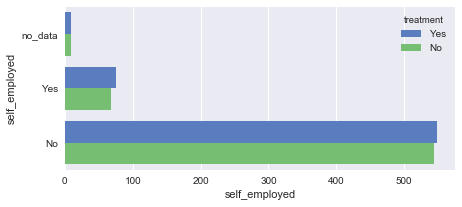


*******************************
family_history


family_history,No,Yes,All
treatment,,,
No,494,127,621
Yes,270,363,633
All,764,490,1254


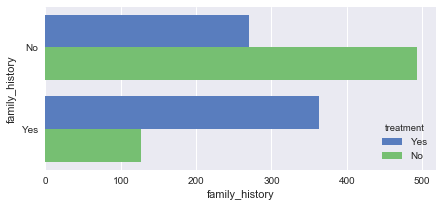


*******************************
work_interfere


work_interfere,Never,Often,Rarely,Sometimes,no_data,All
treatment,,,,,,
No,183,21,51,107,259,621
Yes,30,120,122,357,4,633
All,213,141,173,464,263,1254


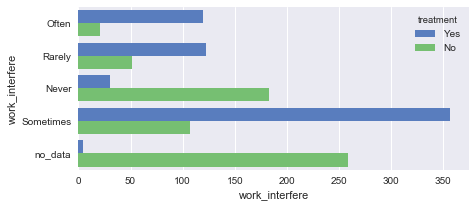


*******************************
no_employees


no_employees,1-5,100-500,26-100,500-1000,6-25,More than 1000,All
treatment,,,,,,,
No,71,81,139,33,162,135,621
Yes,89,95,149,27,127,146,633
All,160,176,288,60,289,281,1254


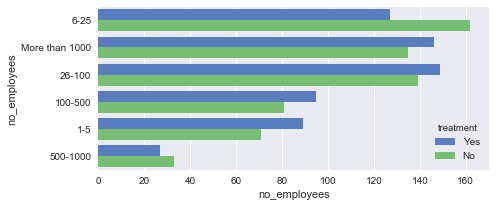


*******************************
remote_work


remote_work,No,Yes,All
treatment,,,
No,444,177,621
Yes,437,196,633
All,881,373,1254


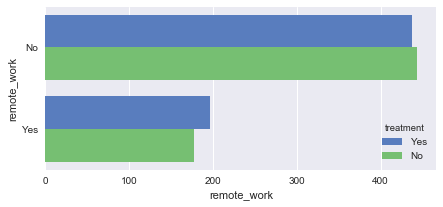


*******************************
tech_company


tech_company,No,Yes,All
treatment,,,
No,104,517,621
Yes,122,511,633
All,226,1028,1254


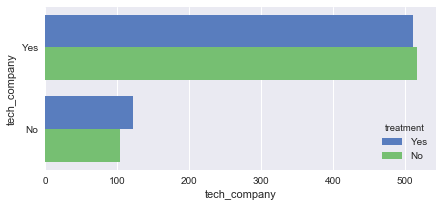


*******************************
benefits


benefits,Don't know,No,Yes,All
treatment,,,,
No,257,193,171,621
Yes,151,179,303,633
All,408,372,474,1254


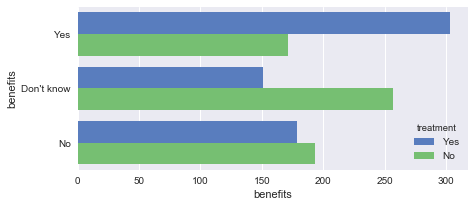


*******************************
care_options


care_options,No,Not sure,Yes,All
treatment,,,,
No,293,191,137,621
Yes,206,123,304,633
All,499,314,441,1254


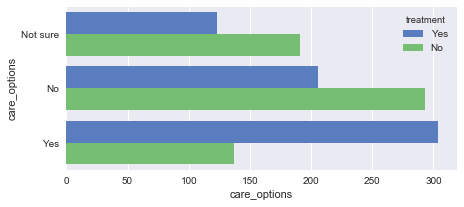


*******************************
wellness_program


wellness_program,Don't know,No,Yes,All
treatment,,,,
No,106,422,93,621
Yes,81,417,135,633
All,187,839,228,1254


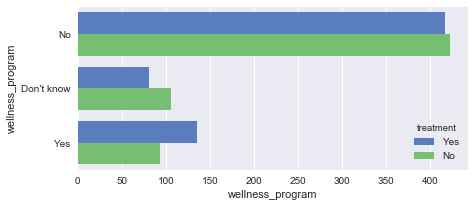


*******************************
seek_help


seek_help,Don't know,No,Yes,All
treatment,,,,
No,197,323,101,621
Yes,166,320,147,633
All,363,643,248,1254


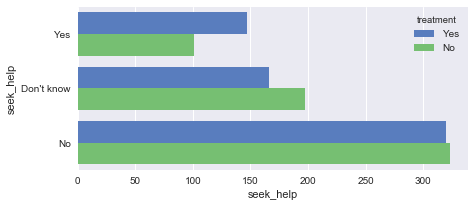


*******************************
anonymity


anonymity,Don't know,No,Yes,All
treatment,,,,
No,447,27,147,621
Yes,369,37,227,633
All,816,64,374,1254


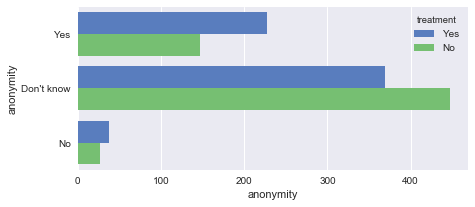


*******************************
leave


leave,Don't know,Somewhat difficult,Somewhat easy,Very difficult,Very easy,All
treatment,,,,,,
No,308,44,135,31,103,621
Yes,253,81,131,66,102,633
All,561,125,266,97,205,1254


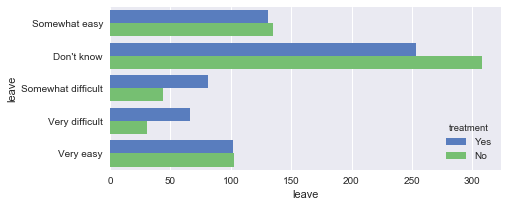


*******************************
mental_health_consequence


mental_health_consequence,Maybe,No,Yes,All
treatment,,,,
No,224,279,118,621
Yes,252,210,171,633
All,476,489,289,1254


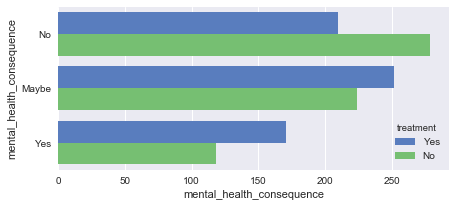


*******************************
phys_health_consequence


phys_health_consequence,Maybe,No,Yes,All
treatment,,,,
No,127,469,25,621
Yes,146,453,34,633
All,273,922,59,1254


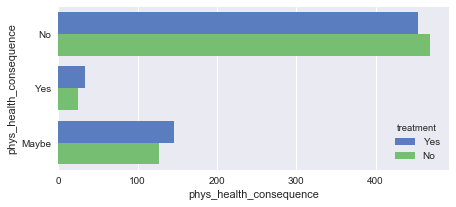


*******************************
coworkers


coworkers,No,Some of them,Yes,All
treatment,,,,
No,141,383,97,621
Yes,117,389,127,633
All,258,772,224,1254


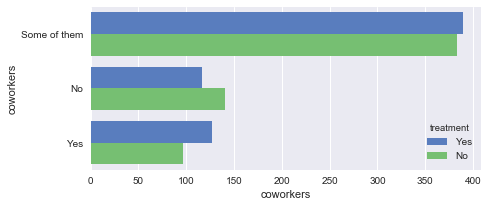


*******************************
supervisor


supervisor,No,Some of them,Yes,All
treatment,,,,
No,186,170,265,621
Yes,204,180,249,633
All,390,350,514,1254


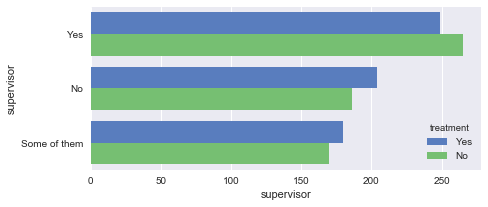


*******************************
mental_health_interview


mental_health_interview,Maybe,No,Yes,All
treatment,,,,
No,125,478,18,621
Yes,82,527,24,633
All,207,1005,42,1254


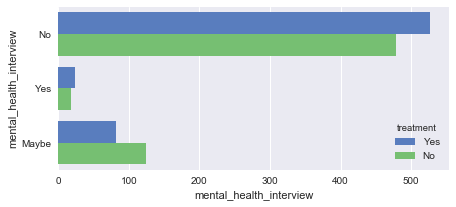


*******************************
phys_health_interview


phys_health_interview,Maybe,No,Yes,All
treatment,,,,
No,290,240,91,621
Yes,266,257,110,633
All,556,497,201,1254


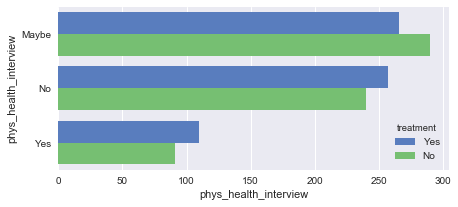


*******************************
mental_vs_physical


mental_vs_physical,Don't know,No,Yes,All
treatment,,,,
No,315,138,168,621
Yes,259,200,174,633
All,574,338,342,1254


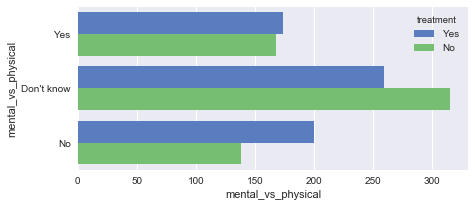


*******************************
obs_consequence


obs_consequence,No,Yes,All
treatment,,,
No,565,56,621
Yes,507,126,633
All,1072,182,1254


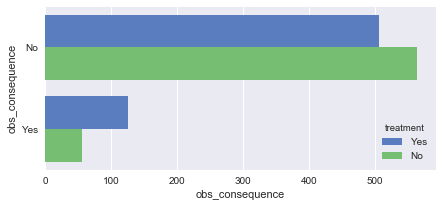

In [22]:
#精神(treatment)と年齢(Age)以外の関係性
for column in df_data.columns:
    if column in ["Timestamp", "treatment", "Gender", "comments"]:
        continue

    # 上記にて違う見せ方が良さそう
    if column in ["Age", "Country", "state", "region", "Gender2", "Gender3"]:
        continue

    print("*******************************")
    print(column)
    df_c = pd.crosstab(index=df_data["treatment"], columns=df_data[column], margins=True)
    display(df_c) 

    plt.figure(figsize=(7,3))
    sns.countplot(y=column, hue="treatment", hue_order=["Yes", "No"], data=df_data)
    plt.xlabel(column)
    plt.show()

    print()
    
    
    #大体の項目はYes,No五分五分だが、family_history,work_interfere,benefits,care_options,Gender辺りは影響がありそう。

In [23]:
#データ項目確認
print(df_data.columns)

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'Gender2',
       'Gender3'],
      dtype='object')


In [24]:
# 使わないデータを削除
df_data_c = df_data.drop("Timestamp", axis=1).drop("Gender", axis=1).drop("Gender3", axis=1).drop("comments", axis=1)
#df_data_c = df_data.drop("Timestamp", axis=1).drop("Gender", axis=1).drop("Gender2", axis=1).drop("comments", axis=1)


# 値の整形を行う
for column in df_data_c.columns:
    # YES/NOのデータの場合は、No:0, Yes:1 で置換する
    if column in ["treatment", "family_history", "remote_work", "tech_company", "obs_consequence"]:
        df_data_c[column] = df_data_c[column].map({"No": 0, "Yes": 1})

# 目的変数を一番左の列に移動させておく(計算しやすいようにするため)
col = df_data_c.columns.tolist() # 列名のリスト
col.remove('treatment')    # 先頭に移動させるため一旦リストから削除
col.insert(0, "treatment") # index:0の前にtreatmentを追加する
df_data_c = df_data_c.loc[:,col]

# ダミー変数の生成
df_data_c = pd.get_dummies(df_data_c)

display(df_data_c.head())
display(df_data_c.shape)

,treatment,Age,family_history,remote_work,tech_company,obs_consequence,Country_Australia,Country_Austria,"Country_Bahamas, The",Country_Belgium,...,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,Gender2_Female,Gender2_Male
0,1,37,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
1,0,44,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
2,0,32,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
3,1,31,1,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,31,0,1,1,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1


(1254, 156)

In [25]:
#各データの種類の確認
for column in df_data_c.columns.values:
    if column in ["Timestamp", "comments"]:
        continue
    print(column, ":", len(set(df_data_c[column])), "件")
    print(set(df_data_c[column]))
    print()

treatment : 2 件
{0, 1}

Age : 48 件
{5, 8, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72}

family_history : 2 件
{0, 1}

remote_work : 2 件
{0, 1}

tech_company : 2 件
{0, 1}

obs_consequence : 2 件
{0, 1}

Country_Australia : 2 件
{0, 1}

Country_Austria : 2 件
{0, 1}

Country_Bahamas, The : 2 件
{0, 1}

Country_Belgium : 2 件
{0, 1}

Country_Bosnia and Herzegovina : 2 件
{0, 1}

Country_Brazil : 2 件
{0, 1}

Country_Bulgaria : 2 件
{0, 1}

Country_Canada : 2 件
{0, 1}

Country_China : 2 件
{0, 1}

Country_Colombia : 2 件
{0, 1}

Country_Costa Rica : 2 件
{0, 1}

Country_Croatia : 2 件
{0, 1}

Country_Czech Republic : 2 件
{0, 1}

Country_Denmark : 2 件
{0, 1}

Country_Finland : 2 件
{0, 1}

Country_France : 2 件
{0, 1}

Country_Georgia : 2 件
{0, 1}

Country_Germany : 2 件
{0, 1}

Country_Greece : 2 件
{0, 1}

Country_Hungary : 2 件
{0, 1}

Country_India : 2 件
{0, 1}

Count

In [26]:
###5.各アルゴリズムの精度検証（CV済みモデルにて）

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# データを準備する
y = df_data_c["treatment"].values
X = df_data_c.iloc[:,1:].values
X_columns = df_data_c.iloc[:,1:].columns

X = X.astype("float64")
# 標準化を行うにあたり、int型だと警告エラーが出ていたので、float64型にキャストする

#X_train = X
#y_train = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
stdsc = StandardScaler()


X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

display(X_train)
display(X_test)
display(y_train)
display(y_test)

array([[-0.94049047, -0.81688456, -0.65447594, ...,  1.57924789,
        -0.45788118,  0.58393372],
       [-0.2786303 ,  1.22416318,  1.52794004, ...,  1.57924789,
        -0.45788118, -1.71252312],
       [-0.01388623, -0.81688456, -0.65447594, ...,  1.57924789,
        -0.45788118,  0.58393372],
       ...,
       [-0.54337437, -0.81688456, -0.65447594, ..., -0.63321281,
        -0.45788118,  0.58393372],
       [-0.01388623, -0.81688456, -0.65447594, ..., -0.63321281,
        -0.45788118,  0.58393372],
       [ 0.25085783, -0.81688456,  1.52794004, ..., -0.63321281,
        -0.45788118,  0.58393372]])

array([[-0.14625827,  1.22416318,  1.52794004, ...,  1.57924789,
        -0.45788118,  0.58393372],
       [ 0.1184858 ,  1.22416318,  1.52794004, ..., -0.63321281,
         2.18397272, -1.71252312],
       [ 0.78034597, -0.81688456,  1.52794004, ..., -0.63321281,
        -0.45788118,  0.58393372],
       ...,
       [-1.33760657,  1.22416318, -0.65447594, ..., -0.63321281,
         2.18397272, -1.71252312],
       [-0.14625827,  1.22416318, -0.65447594, ..., -0.63321281,
        -0.45788118,  0.58393372],
       [-0.41100234, -0.81688456, -0.65447594, ..., -0.63321281,
        -0.45788118,  0.58393372]])

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,

In [28]:
# モデル作成【5-1ロジスティック回帰(LogisticRegression)】
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [29]:
# フィッティング【5-1ロジスティック回帰(LogisticRegression)】
lr.fit (X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
#判定のしきい値【5-1ロジスティック回帰(LogisticRegression)】
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)

y_pred_lr[y_pred_lr < 0.5] = 0
y_pred_lr[y_pred_lr >= 0.5] = 1
print(y_pred_lr)

[1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0
 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1
 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1
 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0
 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0
 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1]


In [31]:
#評価する（混同行列）【5-1ロジスティック回帰(LogisticRegression)】
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)
print('・正則化なし')
print('Confusion Matrix : ')
print(cm)
print('Accuracy = ',(cm[0][0]+cm[1][1]) / (np.array(cm).sum()))
print('Recall of Yes = ',(cm[1][1] / (cm[1][0]+cm[1][1])))
print('Precision of Yes = ',(cm[1][1] / (cm[0][1]+cm[1][1])))

・正則化なし
Confusion Matrix : 
[[142  46]
 [ 36 153]]
Accuracy =  0.7824933687002652
Recall of Yes =  0.8095238095238095
Precision of Yes =  0.7688442211055276


In [32]:
#評価する（混同行列）【5-1ロジスティック回帰(LogisticRegression)】_別方法
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report
print(classification_report(y_true=y_test, y_pred=y_pred_lr))

             precision    recall  f1-score   support

          0       0.80      0.76      0.78       188
          1       0.77      0.81      0.79       189

avg / total       0.78      0.78      0.78       377



In [33]:
# モデル作成【5-2決定木(DecisionTreeClassifier)】
from sklearn.tree import DecisionTreeClassifier, export_graphviz

clf = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_split=3, min_samples_leaf=3, random_state=1234)

In [34]:
# フィッティング【5-2決定木(DecisionTreeClassifier)】
clf = clf.fit(X_train, y_train)
print("score=", clf.score(X_train, y_train))
print(clf.predict(X_test)) #予測したい場合

score= 0.927023945267959
[0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0
 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1
 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1
 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0
 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1
 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1
 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1
 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0
 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1
 1 1 1 1 0 1 1]


In [35]:
# 説明変数の重要度を出力する
# scikit-learnで算出される重要度は、ある説明変数による不純度の減少量合計である。
#print(clf.feature_importances_)
#pd.DataFrame(clf.feature_importances_, index=["x1","x2"]).plot.bar(figsize=(7,2))
#plt.ylabel("Importance")
#plt.xlabel("Features")
#plt.show()

In [36]:
#from sklearn.externals.six import StringIO
# 決定木の描画
#dot_data = StringIO() #dotファイル情報の格納先
#export_graphviz(clf, out_file=dot_data,  
#                     feature_names=["x1", "x2"],  
#                     class_names=["0","1"],  
#                     filled=True, rounded=True,  
#                     special_characters=True) 
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#Image(graph.create_png())

In [37]:
#判定のしきい値【5-2決定木(DecisionTreeClassifier)】
y_pred_clf = clf.predict(X_test)
#print(y_pred_lr)

y_pred_clf[y_pred_clf < 0.5] = 0
y_pred_clf[y_pred_clf >= 0.5] = 1
print(y_pred_clf)

[0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0
 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1
 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1
 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0
 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1
 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1
 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1
 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0
 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1
 1 1 1 1 0 1 1]


In [38]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {'max_depth':[3,5,7]}
cv = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,cv=5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 7]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [39]:
cv.best_params_

{'max_depth': 3}

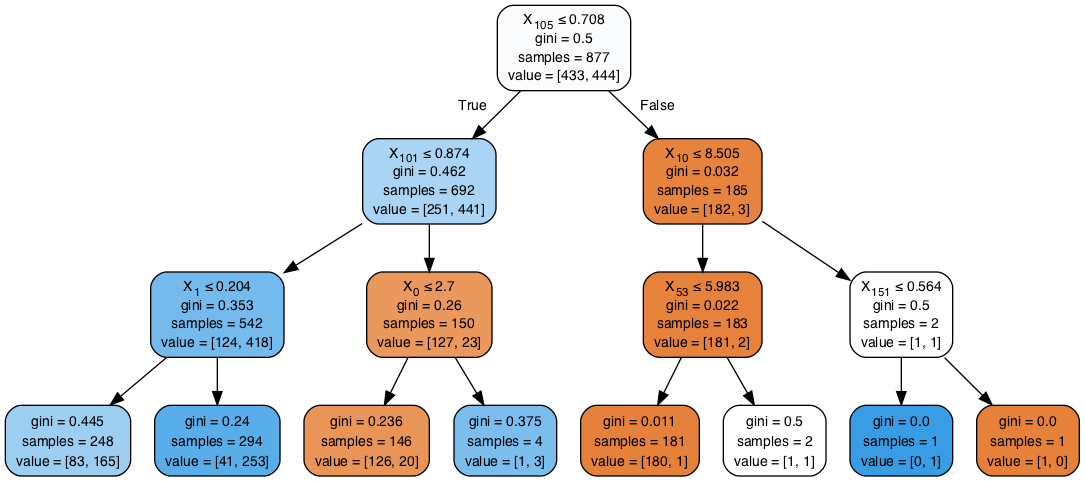

In [40]:
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
# 決定木の描画
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(cv.best_estimator_, out_file=dot_data,  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [41]:
#評価する（混同行列）【5-2決定木(DecisionTreeClassifier)】
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_clf)
print('・正則化なし')
print('Confusion Matrix : ')
print(cm)
print('Accuracy = ',(cm[0][0]+cm[1][1]) / (np.array(cm).sum()))
print('Recall of Yes = ',(cm[1][1] / (cm[1][0]+cm[1][1])))
print('Precision of Yes = ',(cm[1][1] / (cm[0][1]+cm[1][1])))

・正則化なし
Confusion Matrix : 
[[146  42]
 [ 51 138]]
Accuracy =  0.753315649867374
Recall of Yes =  0.7301587301587301
Precision of Yes =  0.7666666666666667


In [42]:
# モデル作成【5-3ランダムフォレスト(RandomForestClassifier)】
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=2, criterion="gini",
                                                 min_samples_leaf=2, min_samples_split=2, random_state=1234)


In [43]:
# フィッティング【5-3ランダムフォレスト(RandomForestClassifier)】
clf.fit(X_train, y_train)
print("score=", clf.score(X_train, y_train))

score= 0.7616875712656784


In [44]:
# 説明変数の重要度を出力する
# scikit-learnで算出される重要度は、ある説明変数による不純度の減少量合計である。
#print(clf.feature_importances_)
#pd.DataFrame(clf.feature_importances_, index=iris.feature_names).plot.bar(figsize=(7,2))
#plt.ylabel("Importance")
#plt.xlabel("Features")
#plt.show()

In [45]:
#判定のしきい値【5-3ランダムフォレスト(RandomForestClassifier)】
y_pred_clf = clf.predict(X_test)
#print(y_pred_lr)

y_pred_clf[y_pred_clf < 0.5] = 0
y_pred_clf[y_pred_clf >= 0.5] = 1
print(y_pred_clf)

[1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1
 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1
 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1
 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1]


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {'max_depth':[3,5,7]}
cv = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,cv=5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 7]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [47]:
cv.best_params_

{'max_depth': 7}

In [48]:
#import graphviz
#import pydotplus
#from IPython.display import Image
#from sklearn.externals.six import StringIO
# 決定木の描画
#dot_data = StringIO() #dotファイル情報の格納先
#export_graphviz(cv.best_estimator_, out_file=dot_data,  
#                     filled=True, rounded=True,  
#                     special_characters=True) 
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#Image(graph.create_png())

In [49]:
#評価する（混同行列）【5-3ランダムフォレスト(RandomForestClassifier)】
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_clf)
print('・正則化なし')
print('Confusion Matrix : ')
print(cm)
print('Accuracy = ',(cm[0][0]+cm[1][1]) / (np.array(cm).sum()))
print('Recall of Yes = ',(cm[1][1] / (cm[1][0]+cm[1][1])))
print('Precision of Yes = ',(cm[1][1] / (cm[0][1]+cm[1][1])))

・正則化なし
Confusion Matrix : 
[[ 97  91]
 [  8 181]]
Accuracy =  0.7374005305039788
Recall of Yes =  0.9576719576719577
Precision of Yes =  0.6654411764705882


In [50]:
# モデル作成【5-4アダブースト(AdaBoostClassifier)】
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3,
                                                min_samples_leaf=2,
                                                min_samples_split=2, 
                                                random_state=1234,
                                                criterion="gini"),
                                                n_estimators=10,random_state=1234)


In [51]:
# フィッティング【5-4アダブースト(AdaBoostClassifier)】
clf.fit(X_train, y_train)
print("score=", clf.score(X_train, y_train))

score= 0.8734321550741163


In [52]:
#判定のしきい値【5-4アダブースト(AdaBoostClassifier)】
y_pred_clf = clf.predict(X_test)
#print(y_pred_lr)

y_pred_clf[y_pred_clf < 0.5] = 0
y_pred_clf[y_pred_clf >= 0.5] = 1
print(y_pred_clf)

[1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0
 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1
 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1
 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1
 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0
 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1
 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0
 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1]


In [53]:
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split, GridSearchCV

#param_grid = {'max_depth':[3,5,7]}
#cv = GridSearchCV(AdaBoostClassifier(),param_grid=param_grid,cv=5)
#cv.fit(X_train, y_train)

In [54]:
#cv.best_params_

In [55]:
#import graphviz
#import pydotplus
#from IPython.display import Image
#from sklearn.externals.six import StringIO
# 決定木の描画
#dot_data = StringIO() #dotファイル情報の格納先
#export_graphviz(cv.best_estimator_, out_file=dot_data,  
#                     filled=True, rounded=True,  
#                     special_characters=True) 
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#Image(graph.create_png())

In [56]:
#評価する（混同行列）【5-4アダブースト(AdaBoostClassifier)】
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_clf)
print('・正則化なし')
print('Confusion Matrix : ')
print(cm)
print('Accuracy = ',(cm[0][0]+cm[1][1]) / (np.array(cm).sum()))
print('Recall of Yes = ',(cm[1][1] / (cm[1][0]+cm[1][1])))
print('Precision of Yes = ',(cm[1][1] / (cm[0][1]+cm[1][1])))

・正則化なし
Confusion Matrix : 
[[136  52]
 [ 35 154]]
Accuracy =  0.7692307692307693
Recall of Yes =  0.8148148148148148
Precision of Yes =  0.7475728155339806


In [57]:
###6.各モデルの比較

In [58]:
###7.精度向上検討

In [59]:
###8.まとめ